In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pickle

In [2]:
df= pd.read_csv("C:/Users/Aditya/Desktop/SIP Updated/OpenAvalancheProject-master/OpenAvalancheProject-master/Data/finalSeriesForTrainingWithLatLon.csv")

In [3]:
df.head()

,Unnamed: 0,Date,regionToJoin,o_day1DangerAboveTreeline,o_day1DangerNearTreeline,o_day1DangerBelowTreeline,n_f_APCPsurface1HourForecast,n_f_10mWindSpeed1HourForecast,n_f_APCPsurface2HourForecast,n_f_10mWindSpeed2HourForecast,...,c_r_Prev3DayWindSlabLikeliness10InPast,c_r_Prev7DayWindSlabLikeliness10InPast,n_r_Prev24HoursPrecipAsRainTotalIn10InPast,n_r_SNOWDAS_SnowDepth_mm10InPast,n_r_SNOWDAS_SWE_mm10InPast,n_r_SNOWDAS_SnowmeltRunoff_micromm10InPast,n_r_SNOWDAS_Sublimation_micromm10InPast,n_r_SNOWDAS_SolidPrecip_kgpersquarem10InPast,n_r_SNOWDAS_LiquidPrecip_kgpersquarem10InPast,n_r_SNOWDAS_SnowpackAveTemp_k10InPast
0,51,2013-12-15,mtHood,Moderate,Moderate,Low,0.000,3.124808,0.000,3.431086,...,0.0,1.0,0.0,128.0,17.0,0.0,-22.0,0.0,0.0,266.0
1,52,2013-12-16,mtHood,Moderate,Moderate,Low,0.125,2.319319,0.125,2.178482,...,0.0,1.0,0.0,122.0,17.0,0.0,-11.0,0.0,0.0,265.0
2,53,2013-12-17,mtHood,Moderate,Moderate,Low,0.000,2.704995,0.000,2.534046,...,0.0,1.0,0.0,328.0,44.0,0.0,-11.0,64.0,0.0,265.0
3,54,2013-12-18,mtHood,Moderate,Low,Low,0.000,2.924325,0.000,2.863802,...,0.0,1.0,0.0,319.0,45.0,0.0,-17.0,9.0,0.0,266.0
4,55,2013-12-19,mtHood,Moderate,Low,Low,0.500,2.812056,0.625,2.031812,...,0.0,0.0,0.0,305.0,45.0,0.0,-16.0,0.0,0.0,266.0


In [4]:
target_col=["o_day1DangerAboveTreeline","o_day1DangerNearTreeline","o_day1DangerBelowTreeline"]
cols_to_use=["n_f_tempMaxF","n_f_10mWindSpeedMax","n_r_snowDepthIn","n_f_tempMinF","n_f_10mWindSpeed","n_f_APCPsurface","n_r_precipIncrementSnowIn","n_r_Prev3daySnowAccumulation","n_r_Prev7daySnowAccumulation","n_r_Prev3dayMaxTemp","n_r_Prev3DayMax10mWind",
            "n_r_Prev3dayMinTemp","n_r_Prev7dayMaxTemp","n_r_Prev7DayMax10mWind",
            "n_r_Prev7dayMinTemp","n_r_Prev1dayMaxTemp","n_r_Prev1DayMax10mWind",
            "n_r_Prev1dayMinTemp","n_r_Prev1DayPrecip","c_r_Prev3DayFreezeThawLikeliness",
            "c_r_Prev7DayFreezeThawLikeliness","c_r_Prev3DayWindSlabLikeliness","c_r_Prev7DayWindSlabLikeliness",
            "c_f_LongTermColdTemps","n_r_Prev24HoursPrecipAsRainTotalIn","n_r_SNOWDAS_SWE_mm",
            "n_r_SNOWDAS_SnowmeltRunoff_micromm","n_r_SNOWDAS_Sublimation_micromm","n_r_SNOWDAS_SolidPrecip_kgpersquarem",
            "n_r_SNOWDAS_LiquidPrecip_kgpersquarem","n_r_SNOWDAS_SnowpackAveTemp_k"]

In [5]:
df_pred= df.loc[:,df.columns.isin(cols_to_use)]
df_pred

,n_f_tempMaxF,n_f_10mWindSpeedMax,n_r_snowDepthIn,n_f_tempMinF,n_f_10mWindSpeed,n_f_APCPsurface,n_r_precipIncrementSnowIn,n_r_Prev3daySnowAccumulation,n_r_Prev7daySnowAccumulation,n_r_Prev3dayMaxTemp,...,c_r_Prev3DayWindSlabLikeliness,c_r_Prev7DayWindSlabLikeliness,c_f_LongTermColdTemps,n_r_Prev24HoursPrecipAsRainTotalIn,n_r_SNOWDAS_SWE_mm,n_r_SNOWDAS_SnowmeltRunoff_micromm,n_r_SNOWDAS_Sublimation_micromm,n_r_SNOWDAS_SolidPrecip_kgpersquarem,n_r_SNOWDAS_LiquidPrecip_kgpersquarem,n_r_SNOWDAS_SnowpackAveTemp_k
0,37.22,3.835701,8.0,33.08,3.228519,30.000,0.0,0.0,0.0,41.54,...,0.0,0.0,0,2.750,48,0,-37,0,0,273
1,50.54,4.059730,8.0,36.86,2.021283,1.375,-1.0,0.0,0.0,50.54,...,0.0,0.0,0,30.000,47,0,-26,0,0,273
2,48.74,3.360394,7.0,35.06,2.187093,0.000,0.0,-1.0,-1.0,50.54,...,0.0,0.0,0,1.375,45,0,-19,0,0,273
3,34.16,4.500113,7.0,20.30,3.213769,14.500,0.0,-1.0,-1.0,50.54,...,0.0,0.0,0,0.000,41,0,-42,0,0,273
4,28.58,4.373972,7.0,15.62,2.724271,5.500,0.0,-1.0,-1.0,48.74,...,0.0,0.0,0,0.000,58,0,-10,11,0,273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74762,38.12,5.479033,20.0,38.12,3.080672,0.000,0.0,0.0,0.0,38.12,...,0.0,0.0,0,3.930,0,0,0,0,1,0
74763,38.12,7.990317,20.0,38.12,4.885046,0.300,0.0,0.0,0.0,38.12,...,0.0,0.0,0,0.000,0,0,0,0,0,0
74764,38.12,8.723920,20.0,38.12,5.581017,0.000,0.0,0.0,0.0,38.12,...,0.0,0.0,0,0.300,0,0,0,0,3,0
74765,38.12,7.019697,20.0,38.12,5.154422,0.000,0.0,0.0,0.0,38.12,...,0.0,0.0,0,0.000,0,0,0,0,0,0


In [6]:
df_target=df.loc[:,df.columns.isin(target_col)]
df_target

,o_day1DangerAboveTreeline,o_day1DangerNearTreeline,o_day1DangerBelowTreeline
0,Moderate,Moderate,Low
1,Moderate,Moderate,Low
2,Moderate,Moderate,Low
3,Moderate,Low,Low
4,Moderate,Low,Low
...,...,...,...
74762,Low,Low,Low
74763,Low,Low,Low
74764,Low,Low,Low
74765,Low,Low,Low


In [7]:
d1= pd.concat([df_pred,df_target], axis=1)
d1

,n_f_tempMaxF,n_f_10mWindSpeedMax,n_r_snowDepthIn,n_f_tempMinF,n_f_10mWindSpeed,n_f_APCPsurface,n_r_precipIncrementSnowIn,n_r_Prev3daySnowAccumulation,n_r_Prev7daySnowAccumulation,n_r_Prev3dayMaxTemp,...,n_r_Prev24HoursPrecipAsRainTotalIn,n_r_SNOWDAS_SWE_mm,n_r_SNOWDAS_SnowmeltRunoff_micromm,n_r_SNOWDAS_Sublimation_micromm,n_r_SNOWDAS_SolidPrecip_kgpersquarem,n_r_SNOWDAS_LiquidPrecip_kgpersquarem,n_r_SNOWDAS_SnowpackAveTemp_k,o_day1DangerAboveTreeline,o_day1DangerNearTreeline,o_day1DangerBelowTreeline
0,37.22,3.835701,8.0,33.08,3.228519,30.000,0.0,0.0,0.0,41.54,...,2.750,48,0,-37,0,0,273,Moderate,Moderate,Low
1,50.54,4.059730,8.0,36.86,2.021283,1.375,-1.0,0.0,0.0,50.54,...,30.000,47,0,-26,0,0,273,Moderate,Moderate,Low
2,48.74,3.360394,7.0,35.06,2.187093,0.000,0.0,-1.0,-1.0,50.54,...,1.375,45,0,-19,0,0,273,Moderate,Moderate,Low
3,34.16,4.500113,7.0,20.30,3.213769,14.500,0.0,-1.0,-1.0,50.54,...,0.000,41,0,-42,0,0,273,Moderate,Low,Low
4,28.58,4.373972,7.0,15.62,2.724271,5.500,0.0,-1.0,-1.0,48.74,...,0.000,58,0,-10,11,0,273,Moderate,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74762,38.12,5.479033,20.0,38.12,3.080672,0.000,0.0,0.0,0.0,38.12,...,3.930,0,0,0,0,1,0,Low,Low,Low
74763,38.12,7.990317,20.0,38.12,4.885046,0.300,0.0,0.0,0.0,38.12,...,0.000,0,0,0,0,0,0,Low,Low,Low
74764,38.12,8.723920,20.0,38.12,5.581017,0.000,0.0,0.0,0.0,38.12,...,0.300,0,0,0,0,3,0,Low,Low,Low
74765,38.12,7.019697,20.0,38.12,5.154422,0.000,0.0,0.0,0.0,38.12,...,0.000,0,0,0,0,0,0,Low,Low,Low


In [8]:
d1.describe()

,n_f_tempMaxF,n_f_10mWindSpeedMax,n_r_snowDepthIn,n_f_tempMinF,n_f_10mWindSpeed,n_f_APCPsurface,n_r_precipIncrementSnowIn,n_r_Prev3daySnowAccumulation,n_r_Prev7daySnowAccumulation,n_r_Prev3dayMaxTemp,...,c_r_Prev3DayWindSlabLikeliness,c_r_Prev7DayWindSlabLikeliness,c_f_LongTermColdTemps,n_r_Prev24HoursPrecipAsRainTotalIn,n_r_SNOWDAS_SWE_mm,n_r_SNOWDAS_SnowmeltRunoff_micromm,n_r_SNOWDAS_Sublimation_micromm,n_r_SNOWDAS_SolidPrecip_kgpersquarem,n_r_SNOWDAS_LiquidPrecip_kgpersquarem,n_r_SNOWDAS_SnowpackAveTemp_k
count,74767.000000,74767.000000,74767.000000,74767.000000,74767.000000,74767.000000,74767.000000,74767.000000,74767.000000,74767.000000,...,74767.000000,74767.000000,74767.000000,74767.000000,74767.000000,74767.000000,74767.000000,74767.000000,74767.000000,74767.000000
mean,37.558434,5.024144,41.635209,28.712410,3.212916,77.209703,0.289922,0.924938,2.226006,40.454713,...,0.116254,0.219094,0.002809,24.797508,301.949055,407.074378,3.532588,30.995038,56.003263,187.011944
std,9.102739,2.090858,32.512027,9.172108,1.524870,135.644877,5.730812,7.757909,11.546091,9.021872,...,0.320532,0.413635,0.052923,77.416780,422.286404,1015.238778,141.114369,71.719646,129.605007,126.459691
min,-4.180000,0.870135,-4.000000,-12.820000,0.359683,0.000000,-138.200000,-96.000000,-88.000000,-4.180000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2034.000000,0.000000,0.000000,0.000000
25%,32.900000,3.500969,15.000000,24.440000,2.065771,0.625000,-1.000000,-2.000000,-3.000000,34.880000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,0.000000,0.000000,0.000000
50%,37.940000,4.756427,38.000000,30.200000,2.950360,22.125000,0.000000,0.000000,0.000000,39.380000,...,0.000000,0.000000,0.000000,0.000000,83.000000,0.000000,0.000000,0.000000,2.000000,273.000000
75%,42.260000,6.223046,62.000000,34.520000,4.085557,93.625000,1.000000,3.000000,6.000000,45.320000,...,0.000000,0.000000,0.000000,1.750000,497.000000,507.000000,0.000000,22.000000,51.000000,273.000000
max,79.160000,16.064323,190.000000,56.480000,11.822029,1567.250000,180.000000,186.000000,190.000000,79.160000,...,1.000000,1.000000,1.000000,1302.500000,3485.000000,18013.000000,6552.000000,836.000000,2440.000000,273.000000


In [9]:
d1.dtypes

n_f_tempMaxF                             float64
n_f_10mWindSpeedMax                      float64
n_r_snowDepthIn                          float64
n_f_tempMinF                             float64
n_f_10mWindSpeed                         float64
n_f_APCPsurface                          float64
n_r_precipIncrementSnowIn                float64
n_r_Prev3daySnowAccumulation             float64
n_r_Prev7daySnowAccumulation             float64
n_r_Prev3dayMaxTemp                      float64
n_r_Prev3DayMax10mWind                   float64
n_r_Prev3dayMinTemp                      float64
n_r_Prev7dayMaxTemp                      float64
n_r_Prev7DayMax10mWind                   float64
n_r_Prev7dayMinTemp                      float64
n_r_Prev1dayMaxTemp                      float64
n_r_Prev1DayMax10mWind                   float64
n_r_Prev1dayMinTemp                      float64
n_r_Prev1DayPrecip                       float64
c_r_Prev3DayFreezeThawLikeliness         float64
c_r_Prev7DayFreezeTh

### Exploratory Data Analysis

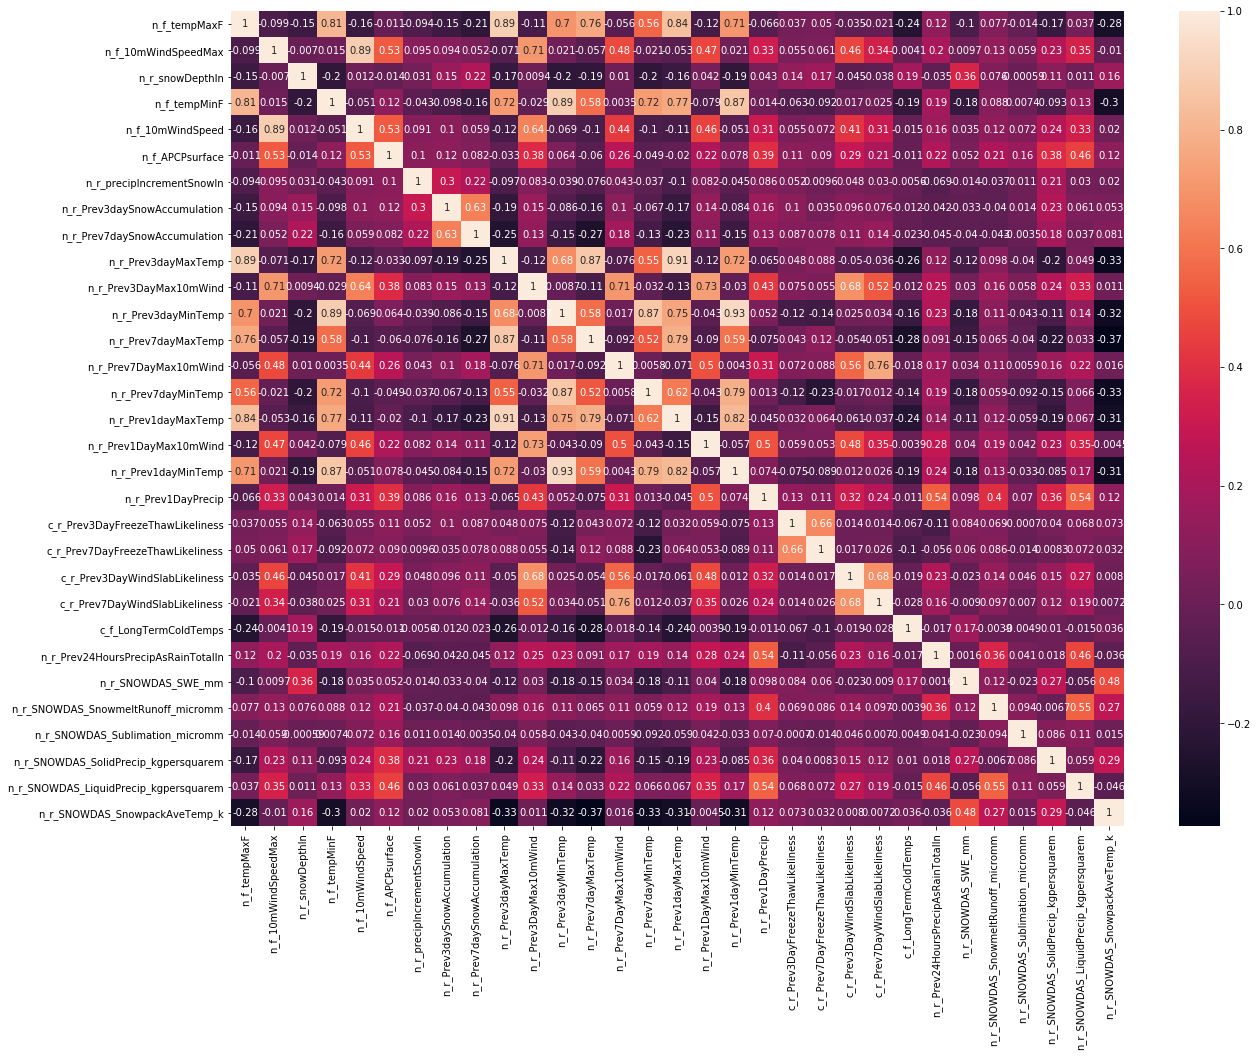

In [10]:
plt.figure(figsize=(20,15))
sns.heatmap(d1.corr(),annot=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

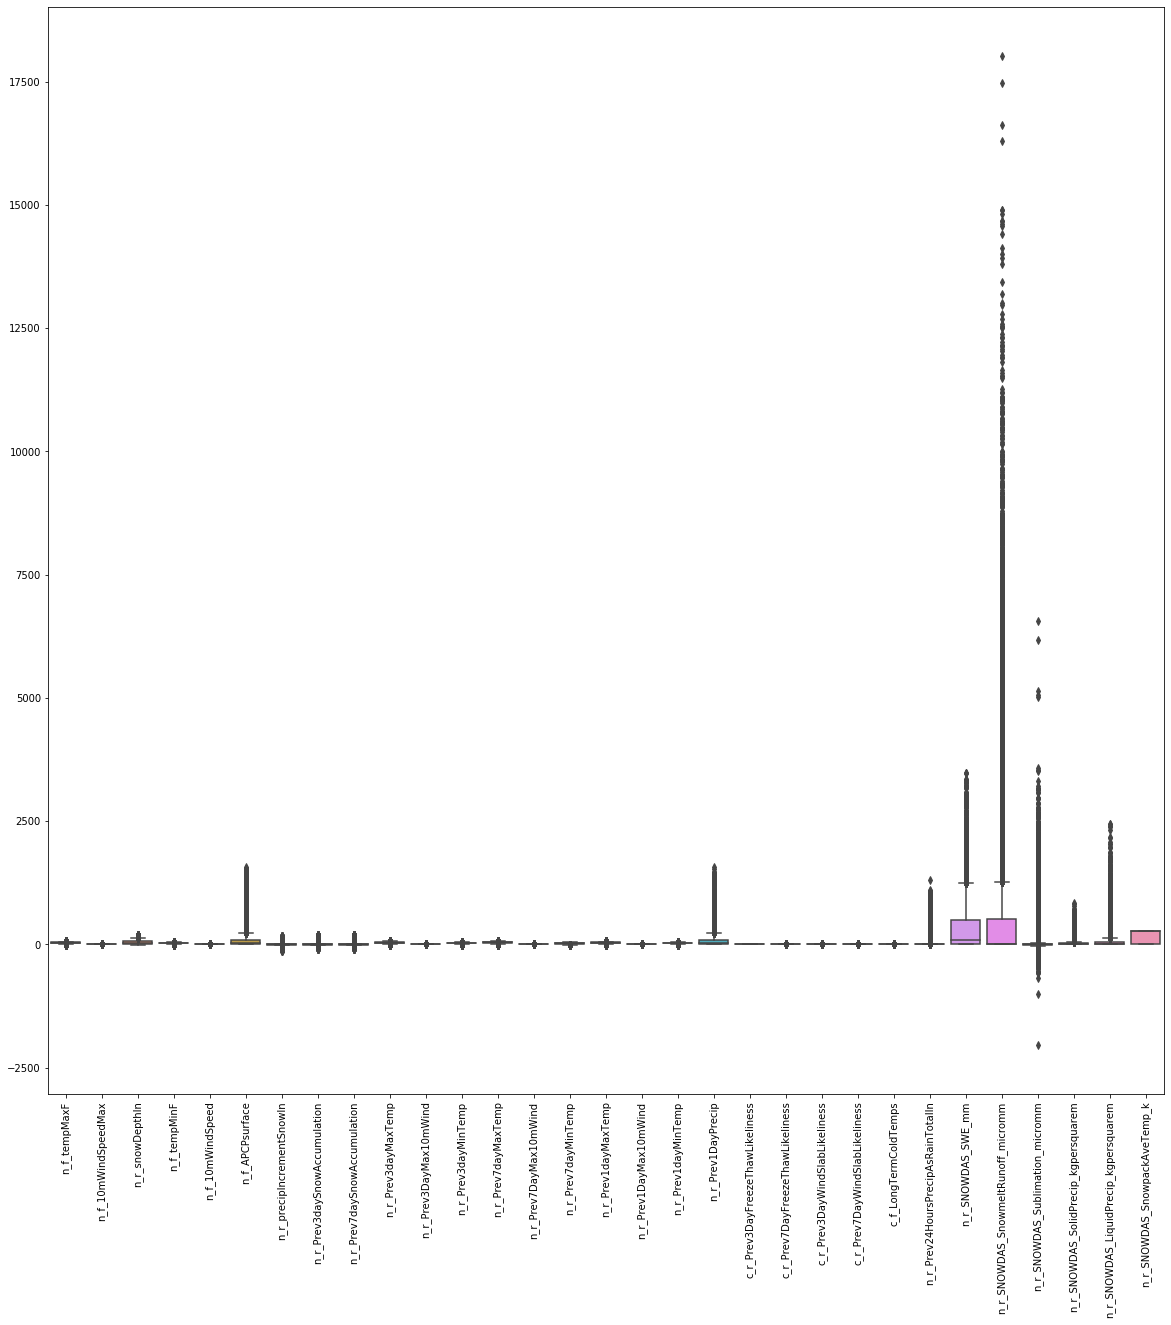

In [11]:
plt.figure(figsize=(20,20))
sns.boxplot(data=d1)
plt.xticks(rotation=90)

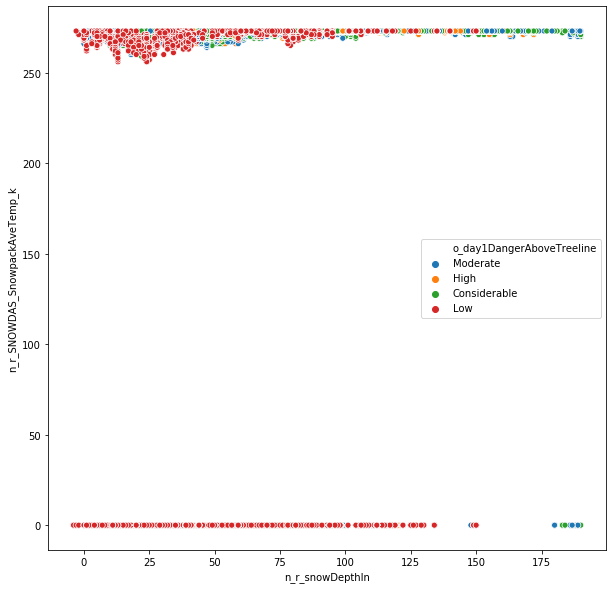

In [12]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="n_r_snowDepthIn",
                y="n_r_SNOWDAS_SnowpackAveTemp_k",
                data=d1,
                hue="o_day1DangerAboveTreeline")

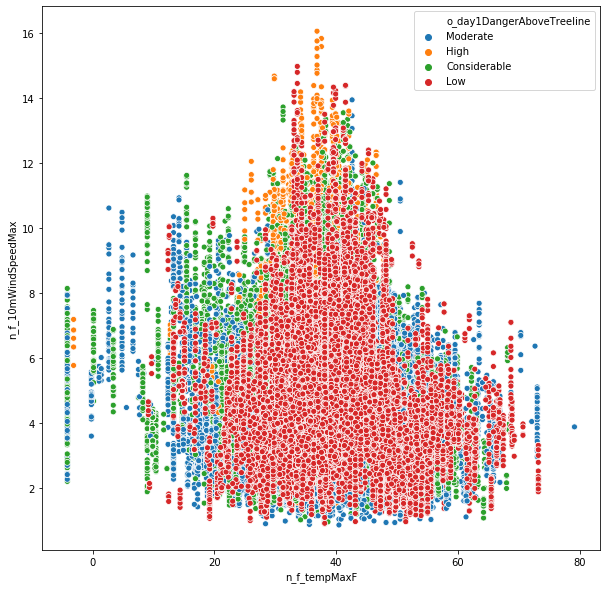

In [13]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="n_f_tempMaxF",
                y="n_f_10mWindSpeedMax",
                data=d1,
                hue="o_day1DangerAboveTreeline",)

<Figure size 1440x1440 with 0 Axes>

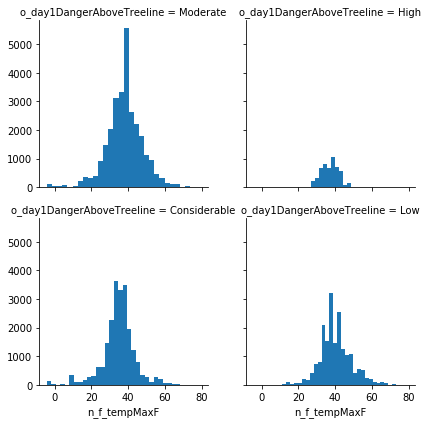

In [44]:
plt.figure(figsize=(20,20))
a= sns.FacetGrid(d1, col="o_day1DangerAboveTreeline", col_wrap=2, margin_titles=True)
a.map(plt.hist,"n_f_tempMaxF", bins=30)

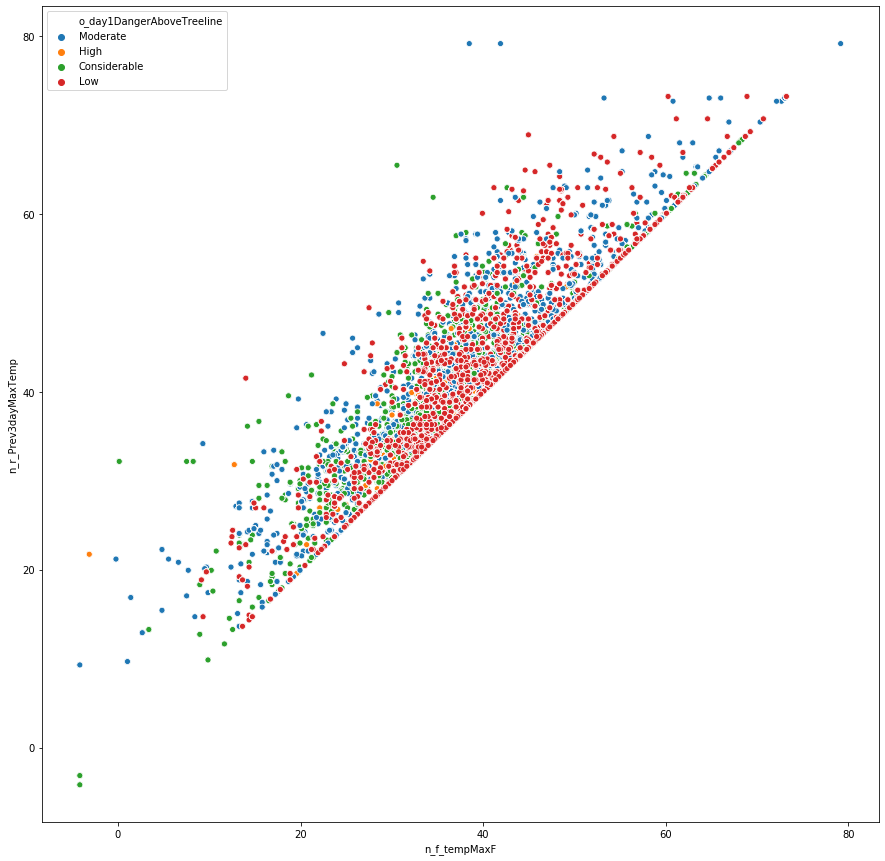

In [15]:
plt.figure(figsize=(15,15))
sns.scatterplot(x="n_f_tempMaxF", y="n_r_Prev3dayMaxTemp", data=d1,
               hue="o_day1DangerAboveTreeline")

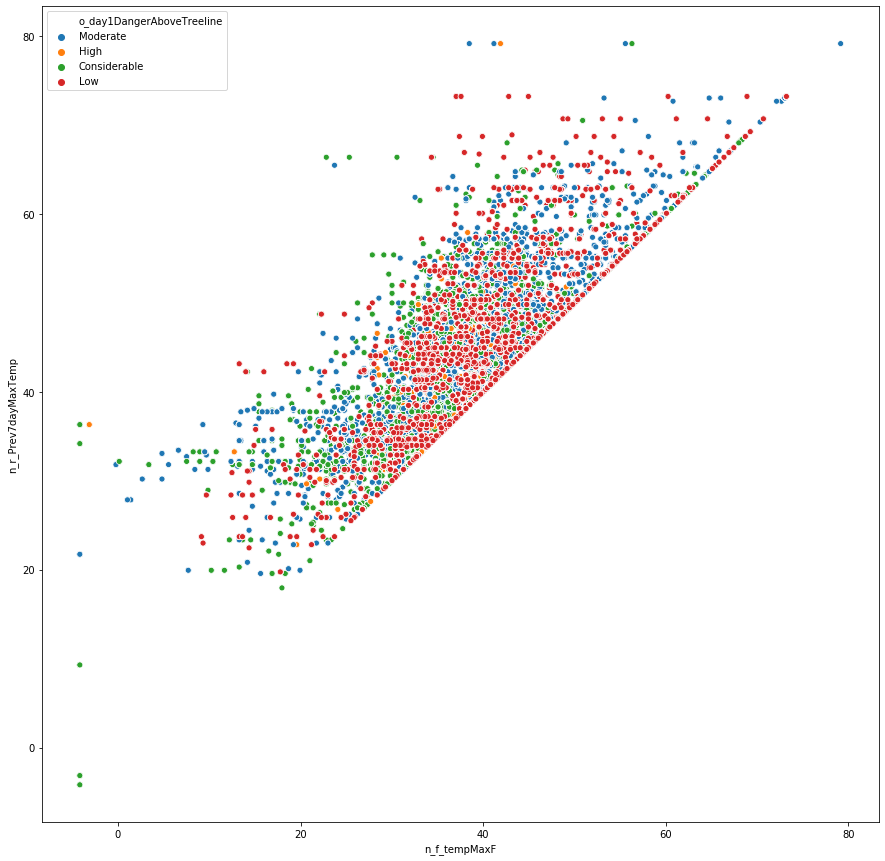

In [16]:
plt.figure(figsize=(15,15))
sns.scatterplot(x="n_f_tempMaxF", y="n_r_Prev7dayMaxTemp", data=d1,
               hue="o_day1DangerAboveTreeline")

## Checking for missing values

In [17]:
d1.isnull().any()

n_f_tempMaxF                             False
n_f_10mWindSpeedMax                      False
n_r_snowDepthIn                          False
n_f_tempMinF                             False
n_f_10mWindSpeed                         False
n_f_APCPsurface                          False
n_r_precipIncrementSnowIn                False
n_r_Prev3daySnowAccumulation             False
n_r_Prev7daySnowAccumulation             False
n_r_Prev3dayMaxTemp                      False
n_r_Prev3DayMax10mWind                   False
n_r_Prev3dayMinTemp                      False
n_r_Prev7dayMaxTemp                      False
n_r_Prev7DayMax10mWind                   False
n_r_Prev7dayMinTemp                      False
n_r_Prev1dayMaxTemp                      False
n_r_Prev1DayMax10mWind                   False
n_r_Prev1dayMinTemp                      False
n_r_Prev1DayPrecip                       False
c_r_Prev3DayFreezeThawLikeliness         False
c_r_Prev7DayFreezeThawLikeliness         False
c_r_Prev3DayW

Since Average Snow Pack Temperature cannot be 0K, these have to be taken as null values have to be imputed

In [18]:
avgSnowPackTemp_median= d1[d1.n_r_SNOWDAS_SnowpackAveTemp_k>0].median()
d1.loc[d1.n_r_SNOWDAS_SnowpackAveTemp_k==0, "n_r_SNOWDAS_SnowpackAveTemp_k"]=np.nan
d1.fillna(avgSnowPackTemp_median,inplace=True)

Also since the snowDepthIn is 0 in cases where there is considerable and moderate danger, it can be assumed that these are null values which have to be imputed

In [19]:
avgSnowDepth_mean= d1[d1.n_r_snowDepthIn>0].mean()
d1.loc[d1.n_r_snowDepthIn==0, "n_r_snowDepthIn"]=np.nan
d1.fillna(avgSnowDepth_mean,inplace=True)

## Handling Outliers

In [20]:
d2=d1.iloc[:,-3:]
d2

,o_day1DangerAboveTreeline,o_day1DangerNearTreeline,o_day1DangerBelowTreeline
0,Moderate,Moderate,Low
1,Moderate,Moderate,Low
2,Moderate,Moderate,Low
3,Moderate,Low,Low
4,Moderate,Low,Low
...,...,...,...
74762,Low,Low,Low
74763,Low,Low,Low
74764,Low,Low,Low
74765,Low,Low,Low


In [21]:
d3=d1.iloc[:,:-3]
d3

,n_f_tempMaxF,n_f_10mWindSpeedMax,n_r_snowDepthIn,n_f_tempMinF,n_f_10mWindSpeed,n_f_APCPsurface,n_r_precipIncrementSnowIn,n_r_Prev3daySnowAccumulation,n_r_Prev7daySnowAccumulation,n_r_Prev3dayMaxTemp,...,c_r_Prev3DayWindSlabLikeliness,c_r_Prev7DayWindSlabLikeliness,c_f_LongTermColdTemps,n_r_Prev24HoursPrecipAsRainTotalIn,n_r_SNOWDAS_SWE_mm,n_r_SNOWDAS_SnowmeltRunoff_micromm,n_r_SNOWDAS_Sublimation_micromm,n_r_SNOWDAS_SolidPrecip_kgpersquarem,n_r_SNOWDAS_LiquidPrecip_kgpersquarem,n_r_SNOWDAS_SnowpackAveTemp_k
0,37.22,3.835701,8.0,33.08,3.228519,30.000,0.0,0.0,0.0,41.54,...,0.0,0.0,0,2.750,48,0,-37,0,0,273.0
1,50.54,4.059730,8.0,36.86,2.021283,1.375,-1.0,0.0,0.0,50.54,...,0.0,0.0,0,30.000,47,0,-26,0,0,273.0
2,48.74,3.360394,7.0,35.06,2.187093,0.000,0.0,-1.0,-1.0,50.54,...,0.0,0.0,0,1.375,45,0,-19,0,0,273.0
3,34.16,4.500113,7.0,20.30,3.213769,14.500,0.0,-1.0,-1.0,50.54,...,0.0,0.0,0,0.000,41,0,-42,0,0,273.0
4,28.58,4.373972,7.0,15.62,2.724271,5.500,0.0,-1.0,-1.0,48.74,...,0.0,0.0,0,0.000,58,0,-10,11,0,273.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74762,38.12,5.479033,20.0,38.12,3.080672,0.000,0.0,0.0,0.0,38.12,...,0.0,0.0,0,3.930,0,0,0,0,1,273.0
74763,38.12,7.990317,20.0,38.12,4.885046,0.300,0.0,0.0,0.0,38.12,...,0.0,0.0,0,0.000,0,0,0,0,0,273.0
74764,38.12,8.723920,20.0,38.12,5.581017,0.000,0.0,0.0,0.0,38.12,...,0.0,0.0,0,0.300,0,0,0,0,3,273.0
74765,38.12,7.019697,20.0,38.12,5.154422,0.000,0.0,0.0,0.0,38.12,...,0.0,0.0,0,0.000,0,0,0,0,0,273.0


In [22]:
le=LabelEncoder()
d2=d2.apply(le.fit_transform)

In [23]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
le_name_mapping

{'Considerable': 0, 'High': 1, 'Low': 2, 'Moderate': 3}

In [24]:
d2

,o_day1DangerAboveTreeline,o_day1DangerNearTreeline,o_day1DangerBelowTreeline
0,3,3,2
1,3,3,2
2,3,3,2
3,3,2,2
4,3,2,2
...,...,...,...
74762,2,2,2
74763,2,2,2
74764,2,2,2
74765,2,2,2


In [25]:
d_main= pd.concat([d3,d2], axis=1)

In [26]:
d_main

,n_f_tempMaxF,n_f_10mWindSpeedMax,n_r_snowDepthIn,n_f_tempMinF,n_f_10mWindSpeed,n_f_APCPsurface,n_r_precipIncrementSnowIn,n_r_Prev3daySnowAccumulation,n_r_Prev7daySnowAccumulation,n_r_Prev3dayMaxTemp,...,n_r_Prev24HoursPrecipAsRainTotalIn,n_r_SNOWDAS_SWE_mm,n_r_SNOWDAS_SnowmeltRunoff_micromm,n_r_SNOWDAS_Sublimation_micromm,n_r_SNOWDAS_SolidPrecip_kgpersquarem,n_r_SNOWDAS_LiquidPrecip_kgpersquarem,n_r_SNOWDAS_SnowpackAveTemp_k,o_day1DangerAboveTreeline,o_day1DangerNearTreeline,o_day1DangerBelowTreeline
0,37.22,3.835701,8.0,33.08,3.228519,30.000,0.0,0.0,0.0,41.54,...,2.750,48,0,-37,0,0,273.0,3,3,2
1,50.54,4.059730,8.0,36.86,2.021283,1.375,-1.0,0.0,0.0,50.54,...,30.000,47,0,-26,0,0,273.0,3,3,2
2,48.74,3.360394,7.0,35.06,2.187093,0.000,0.0,-1.0,-1.0,50.54,...,1.375,45,0,-19,0,0,273.0,3,3,2
3,34.16,4.500113,7.0,20.30,3.213769,14.500,0.0,-1.0,-1.0,50.54,...,0.000,41,0,-42,0,0,273.0,3,2,2
4,28.58,4.373972,7.0,15.62,2.724271,5.500,0.0,-1.0,-1.0,48.74,...,0.000,58,0,-10,11,0,273.0,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74762,38.12,5.479033,20.0,38.12,3.080672,0.000,0.0,0.0,0.0,38.12,...,3.930,0,0,0,0,1,273.0,2,2,2
74763,38.12,7.990317,20.0,38.12,4.885046,0.300,0.0,0.0,0.0,38.12,...,0.000,0,0,0,0,0,273.0,2,2,2
74764,38.12,8.723920,20.0,38.12,5.581017,0.000,0.0,0.0,0.0,38.12,...,0.300,0,0,0,0,3,273.0,2,2,2
74765,38.12,7.019697,20.0,38.12,5.154422,0.000,0.0,0.0,0.0,38.12,...,0.000,0,0,0,0,0,273.0,2,2,2


In [27]:
z=np.abs(stats.zscore(d_main))
z

array([[0.03717956, 0.56840295, 1.15411187, ..., 1.03985387, 0.95707437,
        0.14351239],
       [1.42612602, 0.46125554, 1.15411187, ..., 1.03985387, 0.95707437,
        0.14351239],
       [1.22838202, 0.79573111, 1.18630526, ..., 1.03985387, 0.95707437,
        0.14351239],
       ...,
       [0.06169244, 1.76951285, 0.76779121, ..., 0.23632798, 0.10478242,
        0.14351239],
       [0.06169244, 0.95442482, 0.76779121, ..., 0.23632798, 0.10478242,
        0.14351239],
       [0.06169244, 0.46902805, 0.76779121, ..., 0.23632798, 0.10478242,
        0.14351239]])

In [28]:
df_clean= d_main[(z<3).all(axis=1)]
df_clean

,n_f_tempMaxF,n_f_10mWindSpeedMax,n_r_snowDepthIn,n_f_tempMinF,n_f_10mWindSpeed,n_f_APCPsurface,n_r_precipIncrementSnowIn,n_r_Prev3daySnowAccumulation,n_r_Prev7daySnowAccumulation,n_r_Prev3dayMaxTemp,...,n_r_Prev24HoursPrecipAsRainTotalIn,n_r_SNOWDAS_SWE_mm,n_r_SNOWDAS_SnowmeltRunoff_micromm,n_r_SNOWDAS_Sublimation_micromm,n_r_SNOWDAS_SolidPrecip_kgpersquarem,n_r_SNOWDAS_LiquidPrecip_kgpersquarem,n_r_SNOWDAS_SnowpackAveTemp_k,o_day1DangerAboveTreeline,o_day1DangerNearTreeline,o_day1DangerBelowTreeline
0,37.22,3.835701,8.0,33.08,3.228519,30.000,0.0,0.0,0.0,41.54,...,2.750,48,0,-37,0,0,273.0,3,3,2
1,50.54,4.059730,8.0,36.86,2.021283,1.375,-1.0,0.0,0.0,50.54,...,30.000,47,0,-26,0,0,273.0,3,3,2
2,48.74,3.360394,7.0,35.06,2.187093,0.000,0.0,-1.0,-1.0,50.54,...,1.375,45,0,-19,0,0,273.0,3,3,2
3,34.16,4.500113,7.0,20.30,3.213769,14.500,0.0,-1.0,-1.0,50.54,...,0.000,41,0,-42,0,0,273.0,3,2,2
4,28.58,4.373972,7.0,15.62,2.724271,5.500,0.0,-1.0,-1.0,48.74,...,0.000,58,0,-10,11,0,273.0,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74762,38.12,5.479033,20.0,38.12,3.080672,0.000,0.0,0.0,0.0,38.12,...,3.930,0,0,0,0,1,273.0,2,2,2
74763,38.12,7.990317,20.0,38.12,4.885046,0.300,0.0,0.0,0.0,38.12,...,0.000,0,0,0,0,0,273.0,2,2,2
74764,38.12,8.723920,20.0,38.12,5.581017,0.000,0.0,0.0,0.0,38.12,...,0.300,0,0,0,0,3,273.0,2,2,2
74765,38.12,7.019697,20.0,38.12,5.154422,0.000,0.0,0.0,0.0,38.12,...,0.000,0,0,0,0,0,273.0,2,2,2


## Model Building

In [29]:
X= df_clean.iloc[:,:-3].values
X

array([[ 37.22      ,   3.83570136,   8.        , ...,   0.        ,
          0.        , 273.        ],
       [ 50.54      ,   4.05972994,   8.        , ...,   0.        ,
          0.        , 273.        ],
       [ 48.74      ,   3.36039353,   7.        , ...,   0.        ,
          0.        , 273.        ],
       ...,
       [ 38.12      ,   8.72391968,  20.        , ...,   0.        ,
          3.        , 273.        ],
       [ 38.12      ,   7.01969738,  20.        , ...,   0.        ,
          0.        , 273.        ],
       [ 38.12      ,   6.00480823,  20.        , ...,   0.        ,
          0.        , 273.        ]])

In [30]:
Y_above=df_clean.iloc[:,-3].values

Y_near=df_clean.iloc[:,-2].values

Y_below=df_clean.iloc[:,-3].values

Spliting into train and test data

In [31]:
#DangerAboveTreeline Model
train_x_above, test_x_above, train_y_above, test_y_above= train_test_split(X,Y_above, train_size= 0.8, random_state= 0)
#DangerNearTreeline Model
train_x_near, test_x_near, train_y_near, test_y_near= train_test_split(X,Y_near, train_size= 0.8, random_state= 0)
#DangerBelowTreeline Model
train_x_below, test_x_below, train_y_below, test_y_below= train_test_split(X,Y_below, train_size= 0.8, random_state= 0)

In [32]:
sc= StandardScaler()

train_x_above= sc.fit_transform(train_x_above)
test_x_above= sc.transform(test_x_above)

train_x_near= sc.fit_transform(train_x_near)
test_x_near= sc.transform(test_x_near)

train_x_below= sc.fit_transform(train_x_below)
test_x_below= sc.transform(test_x_below)

### Decision Tree Model

In [33]:
#create an object of decision tree
dt_above= DecisionTreeRegressor(criterion='mse', random_state= 0)
dt_above.fit(train_x_above, train_y_above)

dt_near= DecisionTreeRegressor(criterion='mse', random_state= 0)
dt_near.fit(train_x_near, train_y_near)

dt_below= DecisionTreeRegressor(criterion='mse', random_state= 0)
dt_below.fit(train_x_below, train_y_below)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [34]:
pred_above=dt_above.predict(test_x_above)
pred_near=dt_near.predict(test_x_near)
pred_below=dt_below.predict(test_x_below)

Classification Report of dt_above

In [35]:
print(classification_report(test_y_above,pred_above))
print(confusion_matrix(test_y_above,pred_above))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      3187
           1       0.75      0.74      0.75       541
           2       0.92      0.94      0.93      3383
           3       0.90      0.89      0.89      4867

    accuracy                           0.88     11978
   macro avg       0.85      0.85      0.85     11978
weighted avg       0.88      0.88      0.88     11978

[[2697   96   80  314]
 [  81  403   17   40]
 [  66    8 3166  143]
 [ 333   27  184 4323]]


In [36]:
print(classification_report(test_y_near,pred_near))
print(confusion_matrix(test_y_near,pred_near))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2525
           1       0.77      0.74      0.75       348
           2       0.93      0.93      0.93      4160
           3       0.88      0.89      0.89      4945

    accuracy                           0.89     11978
   macro avg       0.85      0.85      0.85     11978
weighted avg       0.89      0.89      0.89     11978

[[2087   57   48  333]
 [  56  256   16   20]
 [  61    2 3876  221]
 [ 298   17  228 4402]]


In [37]:
print(classification_report(test_y_below,pred_below))
print(confusion_matrix(test_y_below,pred_below))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      3187
           1       0.75      0.74      0.75       541
           2       0.92      0.94      0.93      3383
           3       0.90      0.89      0.89      4867

    accuracy                           0.88     11978
   macro avg       0.85      0.85      0.85     11978
weighted avg       0.88      0.88      0.88     11978

[[2697   96   80  314]
 [  81  403   17   40]
 [  66    8 3166  143]
 [ 333   27  184 4323]]


## Navie Bayes Model

In [38]:
navie_above= GaussianNB()
navie_above.fit(train_x_above, train_y_above)

navie_near= GaussianNB()
navie_near.fit(train_x_near, train_y_near)

navie_below= GaussianNB()
navie_below.fit(train_x_below, train_y_below)

GaussianNB(priors=None, var_smoothing=1e-09)

In [39]:
pred2_above=navie_above.predict(test_x_above)
pred2_near=navie_near.predict(test_x_near)
pred2_below=navie_below.predict(test_x_below)

In [40]:
print(classification_report(test_y_above,pred2_above))
print(confusion_matrix(test_y_above,pred2_above))

              precision    recall  f1-score   support

           0       0.55      0.39      0.46      3187
           1       0.23      0.44      0.30       541
           2       0.53      0.71      0.61      3383
           3       0.63      0.53      0.57      4867

    accuracy                           0.54     11978
   macro avg       0.48      0.52      0.48     11978
weighted avg       0.56      0.54      0.54     11978

[[1244  551  544  848]
 [ 176  238   54   73]
 [ 190  174 2410  609]
 [ 643   86 1575 2563]]


In [41]:
print(classification_report(test_y_near,pred2_near))
print(confusion_matrix(test_y_near,pred2_near))

              precision    recall  f1-score   support

           0       0.46      0.40      0.43      2525
           1       0.19      0.45      0.26       348
           2       0.58      0.72      0.64      4160
           3       0.62      0.47      0.54      4945

    accuracy                           0.54     11978
   macro avg       0.46      0.51      0.47     11978
weighted avg       0.56      0.54      0.54     11978

[[1007  390  431  697]
 [ 109  156   31   52]
 [ 347  141 2978  694]
 [ 712  146 1739 2348]]


In [42]:
print(classification_report(test_y_below,pred2_below))
print(confusion_matrix(test_y_below,pred2_below))

              precision    recall  f1-score   support

           0       0.55      0.39      0.46      3187
           1       0.23      0.44      0.30       541
           2       0.53      0.71      0.61      3383
           3       0.63      0.53      0.57      4867

    accuracy                           0.54     11978
   macro avg       0.48      0.52      0.48     11978
weighted avg       0.56      0.54      0.54     11978

[[1244  551  544  848]
 [ 176  238   54   73]
 [ 190  174 2410  609]
 [ 643   86 1575 2563]]


As can be seen the accuracy of Naives Bayes is much lower than that of the Decision Tree. Hence the model that will be deployed is the Decision Tree Model

In [43]:
pickle.dump(dt_above,open('./dt_above.h5','wb'))
pickle.dump(dt_near,open('./dt_near.h5','wb'))
pickle.dump(dt_below,open('./dt_below.h5','wb'))
pickle.dump(sc,open('./scaler.pkl','wb'))